# Data Science in Economics and Business - Class Project
In this class project, you are supposed to work with experimental data from the paper "The Many Faces of Human Sociality: Uncovering the Distribution and Stability of Social Preferences" by Bruhin, Fehr, and Schunk, published in the *Journal of the European Economic Association* 17(4): 1025-1069, 2019: https://doi.org/10.1093/jeea/jvy018

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**IMPORTANT:** <br>
Please enter the matriculation number of all group members here:
1. XXXXXX
2. YYYYYY
3. ZZZZZZ

In this class project, you will use the different techniques taught in the course: data handling, data visualization, and machine learning.

First load the necessary packages. <br>
If you want to use additional libraries you can add them to the following cell:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import folium
from folium.plugins import MarkerCluster

The authors observe human behavior in the so-called dictator game: One player (*dictator*) receives a certain amount of money and can distribute this endowment between herself and another player (*receiver*). The decision of the dictator is implemented, and the receiver has no choice to take and must accept the dictator's decision. <br>
The authors employ a binary version of the dictator game in which the dictator can choose between two alternative allocation options *X* and *Y*. Each dictator in the experiment plays 30 of these dictator games with varying pairs of decision alternatives. <br>
All subjects in the experiment were students from the University of Zurich and the Swiss Federal Institute of Technology Zurich.

# Problem 1 - Data Handling
The basis of your work will be the following two datasets:
- `choices.csv` contains the decisions of the dictators across the 30 variations of the binary dictator game.
    - *sid* is the ID of the subject.
    - *gid* is the ID of the game variation.
    - *order* is the (random) order in which the game appeared in the block of dictator games.
    - *self_x* and *self_y* are the payoffs of the dictator in choice option X and Y, respectively.
    - *other_x* and *other_y* are the payoffs of the receiver in choice option X and Y, respectively.
    - *choice_x* describes the decision of the dictator, with a value of 1 representing the choice of option X, and 0 the choice of option Y.
    - *s_x* and *s_y* are indicators of disadvantageous inequality for the dictator in option X and option Y, respectively. That is, *s_x* equals 1 if the dictator receives lower payoff in option X than the receiver, and 0 if the dictator receive higher payoff in option X than the receiver.
    - *r_x* and *r_y* are indicators of advantageous inequality for the dictator in option X and option Y, respectively. That is, *r_x* equals 1 if the dictator receives higher payoff in option X than the receiver, and 0 if the dictator receive lower payoff in option X than the receiver.
    - Note that *r_x = 1 - s_x* and *r_y = 1 - s_y*
- `subjects.csv` contains the results from the post-experimental questionnaire.
    - *sid* is the ID of the subject.
    - *bf_consciousness, bf_openness, bf_extraversion, bf_agreeableness, bf_neuroticism* are the results from the Big Five measures.
    - *cogabil* is a measure of cognitive ability.
    - *pe_D1_stud_natsci, pe_D1_stud_law, pe_D1_stud_socsci, pe_D1_stud_med* indicate the subject's field of study (natural sciences, law, social sciences, or medicine, respectively).
    - *pe_monthinc* is the subject's monthly income.
    - *pe_age* is the subject's age.
    - *pe_female* equals 1 if the subject is female, and 0 otherwise.

In [ ]:
choices = pd.read_csv("choices.csv", sep=",")
choices

,sid,gid,order,self_x,self_y,other_x,other_y,choice_x,s_y,s_x,r_y,r_x
0,102010050706,361,1,940,800,150,510,0,0,0,1,1
1,102010050706,281,2,970,770,490,170,0,0,0,1,1
2,102010050706,391,3,1060,680,330,330,1,0,0,1,1
3,102010050706,271,4,990,750,480,180,1,0,0,1,1
4,102010050706,311,5,930,810,510,150,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6781,172010050704,251,35,780,420,540,660,1,1,0,0,1
6782,172010050704,191,36,680,520,780,420,0,0,1,1,0
6783,172010050704,221,37,620,580,410,790,1,1,0,0,1
6784,172010050704,231,38,670,530,420,780,1,1,0,0,1


In [ ]:
subjects = pd.read_csv("subjects.csv", sep=",")
subjects

,sid,bf_consciousness,bf_openness,bf_extraversion,bf_agreeableness,bf_neuroticism,cogabil,pe_D1_stud_natsci,pe_D1_stud_law,pe_D1_stud_socsci,pe_D1_stud_med,pe_monthinc,pe_age,pe_female
0,12010050501,9,17,4,11,-1,3,1,0,0,0,400,21,1
1,12010050502,5,22,4,7,7,7,1,0,0,0,800,21,0
2,12010050603,4,18,4,9,7,3,0,0,1,0,800,23,0
3,12010050704,8,17,1,10,7,9,1,0,0,0,500,22,0
4,12010050705,10,15,-3,12,0,4,0,0,0,1,350,19,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,312010050705,5,18,0,11,1,12,1,0,0,0,500,20,0
156,322010050501,6,18,8,8,8,6,0,0,0,1,450,20,1
157,332010050501,7,19,8,7,-1,6,0,0,0,1,600,20,0
158,342010050501,10,17,0,9,7,8,0,0,0,1,300,20,1


#### a)
Merge the two datasets into one. <br>
Check whether you have behavioral data (from `choices`) and personal information (from `subjects`) on all subjects. <br>
If not, create an indicator for missing data and list the IDs of the subjects concerned.

In [ ]:
choices = pd.read_csv('choices.csv')
subjects = pd.read_csv('subjects.csv')

#Merge the datasets on 'sid'
merged_data = pd.merge(choices, subjects, on='sid', how='outer', indicator=True)

#Check for missing data
missing_behavioral = merged_data[merged_data['_merge'] == 'left_only']
missing_personal = merged_data[merged_data['_merge'] == 'right_only']

#Create indicators for missing data
merged_data['missing_behavioral'] = merged_data['_merge'] == 'left_only'
merged_data['missing_personal'] = merged_data['_merge'] == 'right_only'

#List the IDs of the subjects with missing data
missing_behavioral_ids = missing_behavioral['sid'].unique()
missing_personal_ids = missing_personal['sid'].unique()

#Add two new colums for evaluation
merged_data['dictator_payoff_difference'] = merged_data['self_x'] - merged_data['self_y']
merged_data['receiver_payoff_difference'] = merged_data['other_x'] - merged_data['other_y']
merged_data['chosen_option'] = merged_data['choice_x'].apply(lambda x: 'X' if x == 1 else 'Y')


print("Subjects with missing behavioral data (choices):")
print(missing_behavioral_ids)
print("\nSubjects with missing personal information (subjects):")
print(missing_personal_ids)
merged_data.drop(columns=['_merge'], inplace=True)
print("\nMerged Dataset with Missing Data Indicators:")
print(merged_data.head())

Subjects with missing behavioral data (choices):
[102010050706  62010050706 202010050704 122010050603 172010050501
 212010050704 362010050501  82010050705 162010050502 192010050502
 292010050502 132010050706 152010050706 172010050704]

Subjects with missing personal information (subjects):
[]

Merged Dataset with Missing Data Indicators:
            sid  gid  order  self_x  self_y  other_x  other_y  choice_x  s_y  \
0  102010050706  361      1     940     800      150      510         0    0   
1  102010050706  281      2     970     770      490      170         0    0   
2  102010050706  391      3    1060     680      330      330         1    0   
3  102010050706  271      4     990     750      480      180         1    0   
4  102010050706  311      5     930     810      510      150         0    0   

   s_x  ...  pe_D1_stud_socsci  pe_D1_stud_med  pe_monthinc  pe_age  \
0    0  ...                NaN             NaN          NaN     NaN   
1    0  ...                NaN       

#### b)
Try out different representations of the data (long vs. wide etc.).

In [ ]:
wide_format = merged_data.pivot_table(index='sid', columns='gid',
                                      values=['choice_x', 'self_x', 'self_y', 'other_x', 'other_y', 'order', 's_x', 's_y', 'r_x', 'r_y'],
                                      aggfunc='first')

# Flatten the multi-level columns for better readability
wide_format.columns = ['_'.join(map(str, col)).strip() for col in wide_format.columns.values]
wide_format.reset_index(inplace=True)

print("\nWide Format Representation:")
print(wide_format.head())

# Step 5: Long format representation
# Melt the dataset to get a long format
long_format = pd.melt(merged_data, id_vars=['sid', 'gid', 'order'],
                      value_vars=['choice_x', 'self_x', 'self_y', 'other_x', 'other_y', 's_x', 's_y', 'r_x', 'r_y'],
                      var_name='variable', value_name='value')

print("\nLong Format Representation:")
print(long_format.head())


Wide Format Representation:
           sid  choice_x_11  choice_x_21  choice_x_31  choice_x_41  \
0  12010050501            1            1            1            1   
1  12010050502            1            1            1            1   
2  12010050603            1            1            0            0   
3  12010050704            1            1            1            1   
4  12010050705            1            1            1            1   

   choice_x_51  choice_x_61  choice_x_71  choice_x_81  choice_x_91  ...  \
0            1            1            1            1            1  ...   
1            1            1            1            0            0  ...   
2            1            0            1            1            1  ...   
3            1            1            1            1            1  ...   
4            1            1            1            0            0  ...   

   self_y_301  self_y_311  self_y_321  self_y_331  self_y_341  self_y_351  \
0         830         

# Problem 2 - Data Visualization
#### a)
As a first type of visualization, focus on the choices and the decision scenarios. <br>
That is, use the payoffs and indicators of (dis)advantageous inequality. <br>
You can use any kind that you deem useful: histograms, line plots, etc.

Preparation: Simple Eval function

In [ ]:
def evaluate_decision_with_difference(row):
    """
    Evaluate the decision based on payoffs and calculate the difference.

    Parameters:
    - row: a pandas Series representing a single row in the dataframe

    Returns:
    - decision: 1 if choosing option X is better for the dictator, 0 if choosing option Y is better
    - difference: the absolute difference in payoffs between option X and option Y for the dictator
    """
    difference = abs(row['self_x'] - row['self_y'])
    if row['self_x'] > row['self_y']:
        return pd.Series([1, difference])  # Choose option X
    elif row['self_x'] < row['self_y']:
        return pd.Series([0, difference])  # Choose option Y
    else:
        return pd.Series([-1, 0])  # If payoffs are equal, indicate indifference or neutrality

#Apply to merged_data


merged_data[['evaluated_decision', 'payoff_difference']] = merged_data.apply(evaluate_decision_with_difference, axis=1)


In [ ]:
merged_data.head()

,sid,gid,order,self_x,self_y,other_x,other_y,choice_x,s_y,s_x,...,pe_D1_stud_law,pe_D1_stud_socsci,pe_D1_stud_med,pe_monthinc,pe_age,pe_female,missing_behavioral,missing_personal,evaluated_decision,payoff_difference
0,102010050706,361,1,940,800,150,510,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,True,False,1,140
1,102010050706,281,2,970,770,490,170,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,True,False,1,200
2,102010050706,391,3,1060,680,330,330,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,True,False,1,380
3,102010050706,271,4,990,750,480,180,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,True,False,1,240
4,102010050706,311,5,930,810,510,150,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,True,False,1,120


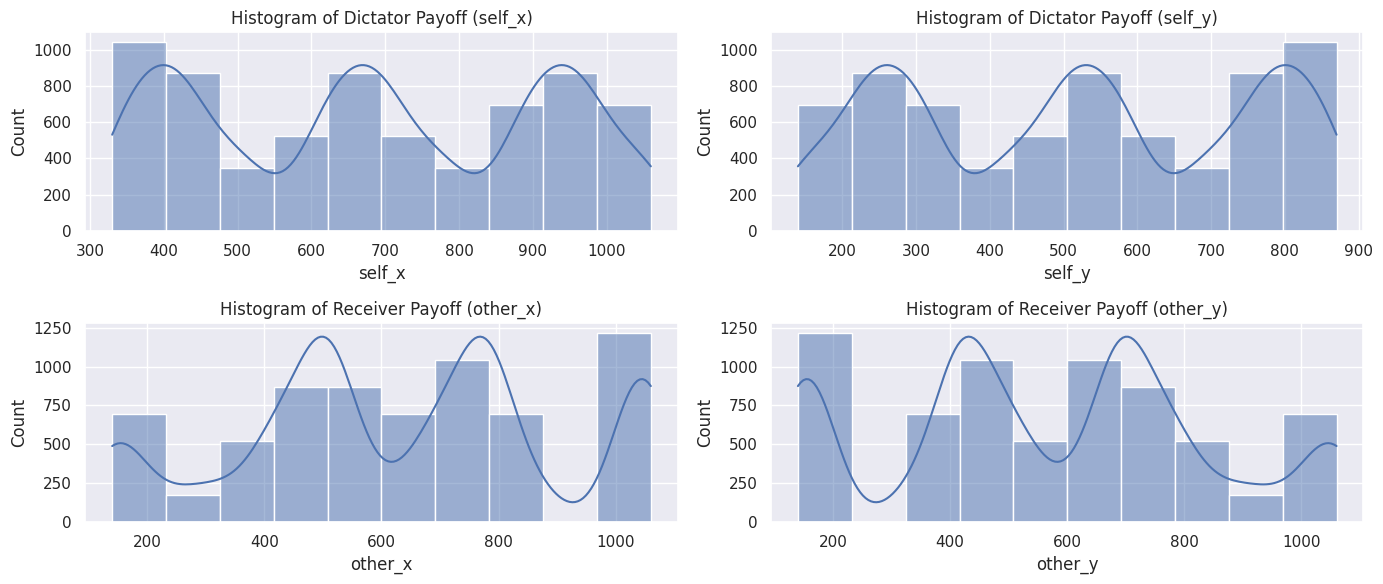

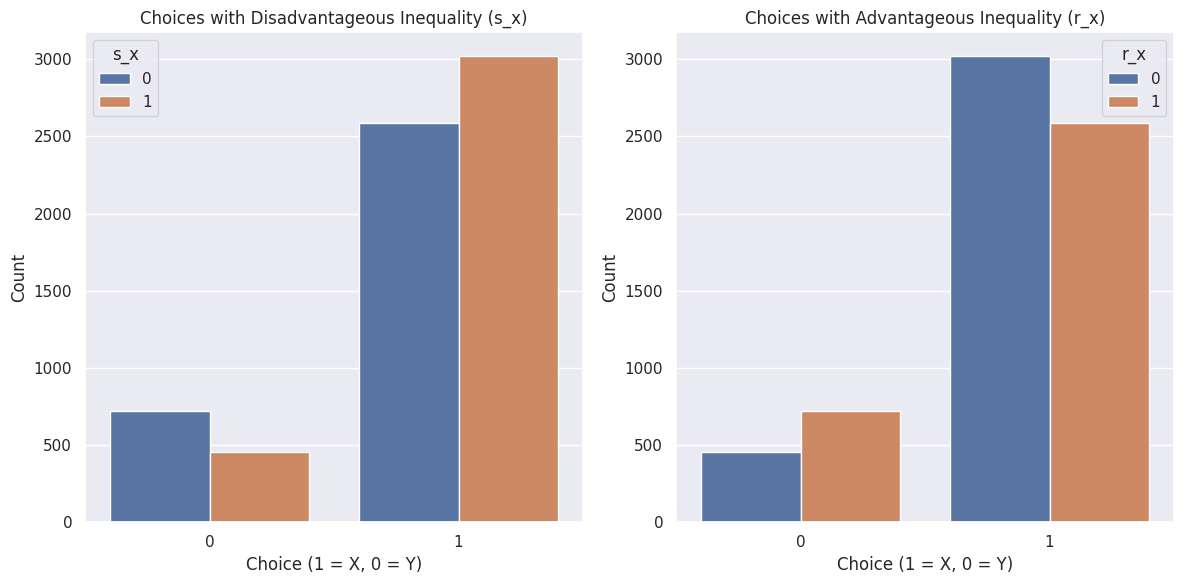

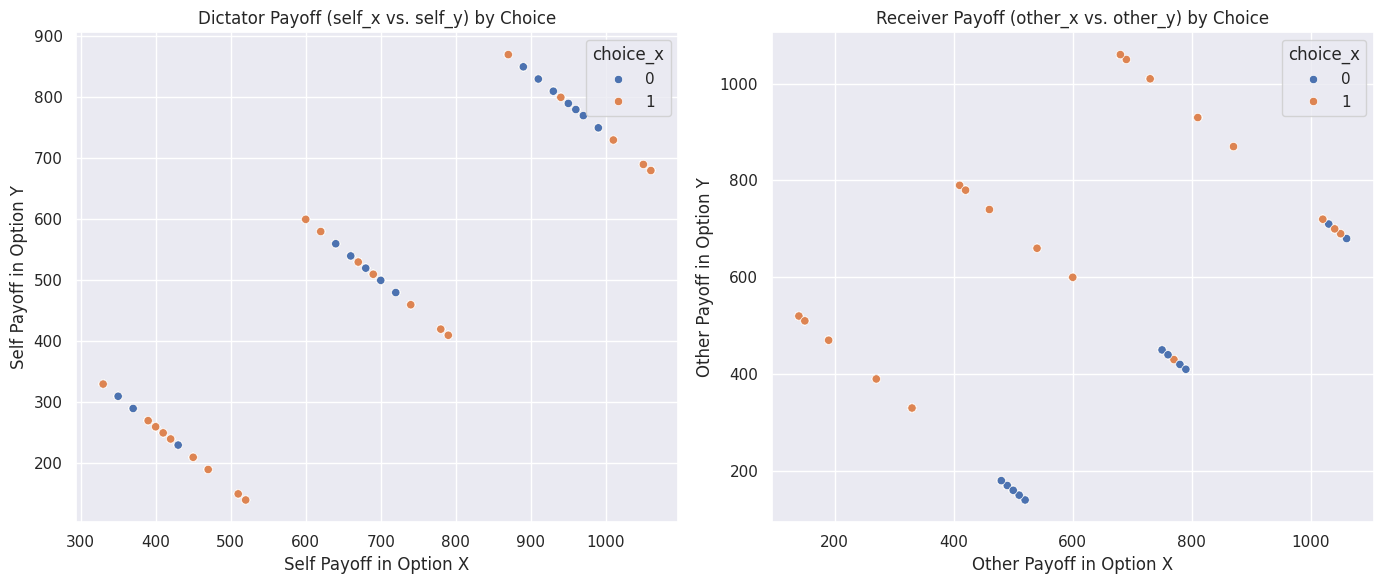

In [ ]:
#NO INDICATOR USED
#Histogram of Payoffs for Dictator and Receiver
plt.figure(figsize=(14, 6))

plt.subplot(2, 2, 1)
sns.histplot(merged_data['self_x'], bins=10, kde=True)
plt.title('Histogram of Dictator Payoff (self_x)')

plt.subplot(2, 2, 2)
sns.histplot(merged_data['self_y'], bins=10, kde=True)
plt.title('Histogram of Dictator Payoff (self_y)')

plt.subplot(2, 2, 3)
sns.histplot(merged_data['other_x'], bins=10, kde=True)
plt.title('Histogram of Receiver Payoff (other_x)')

plt.subplot(2, 2, 4)
sns.histplot(merged_data['other_y'], bins=10, kde=True)
plt.title('Histogram of Receiver Payoff (other_y)')

plt.tight_layout()
plt.show()

#Bar Plot of Choices based on (dis)advantageous inequality
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='choice_x', hue='s_x', data=merged_data)
plt.title('Choices with Disadvantageous Inequality (s_x)')
plt.xlabel('Choice (1 = X, 0 = Y)')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(x='choice_x', hue='r_x', data=merged_data)
plt.title('Choices with Advantageous Inequality (r_x)')
plt.xlabel('Choice (1 = X, 0 = Y)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Scatter Plot of Payoffs vs Choices
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='self_x', y='self_y', hue='choice_x', data=merged_data)
plt.title('Dictator Payoff (self_x vs. self_y) by Choice')
plt.xlabel('Self Payoff in Option X')
plt.ylabel('Self Payoff in Option Y')

plt.subplot(1, 2, 2)
sns.scatterplot(x='other_x', y='other_y', hue='choice_x', data=merged_data)
plt.title('Receiver Payoff (other_x vs. other_y) by Choice')
plt.xlabel('Other Payoff in Option X')
plt.ylabel('Other Payoff in Option Y')

plt.tight_layout()
plt.show()


#### b)
Now also include the information on the subjects from the questionnaires in your plots. <br>
You can use any kind that you deem useful: histograms, line plots, etc.

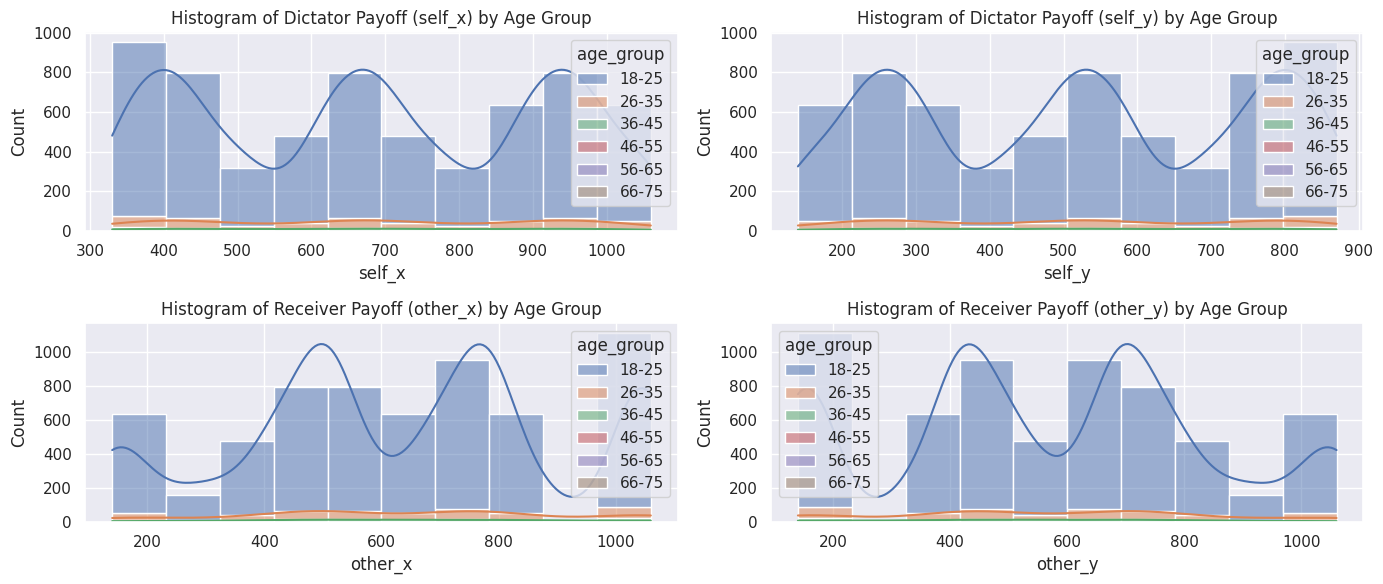

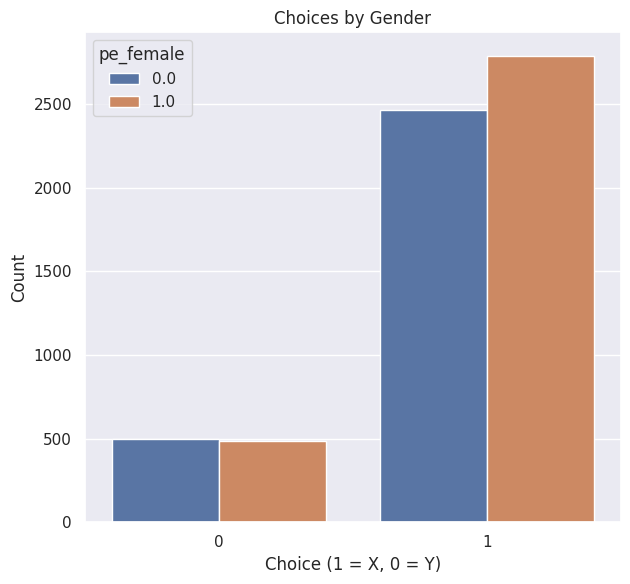

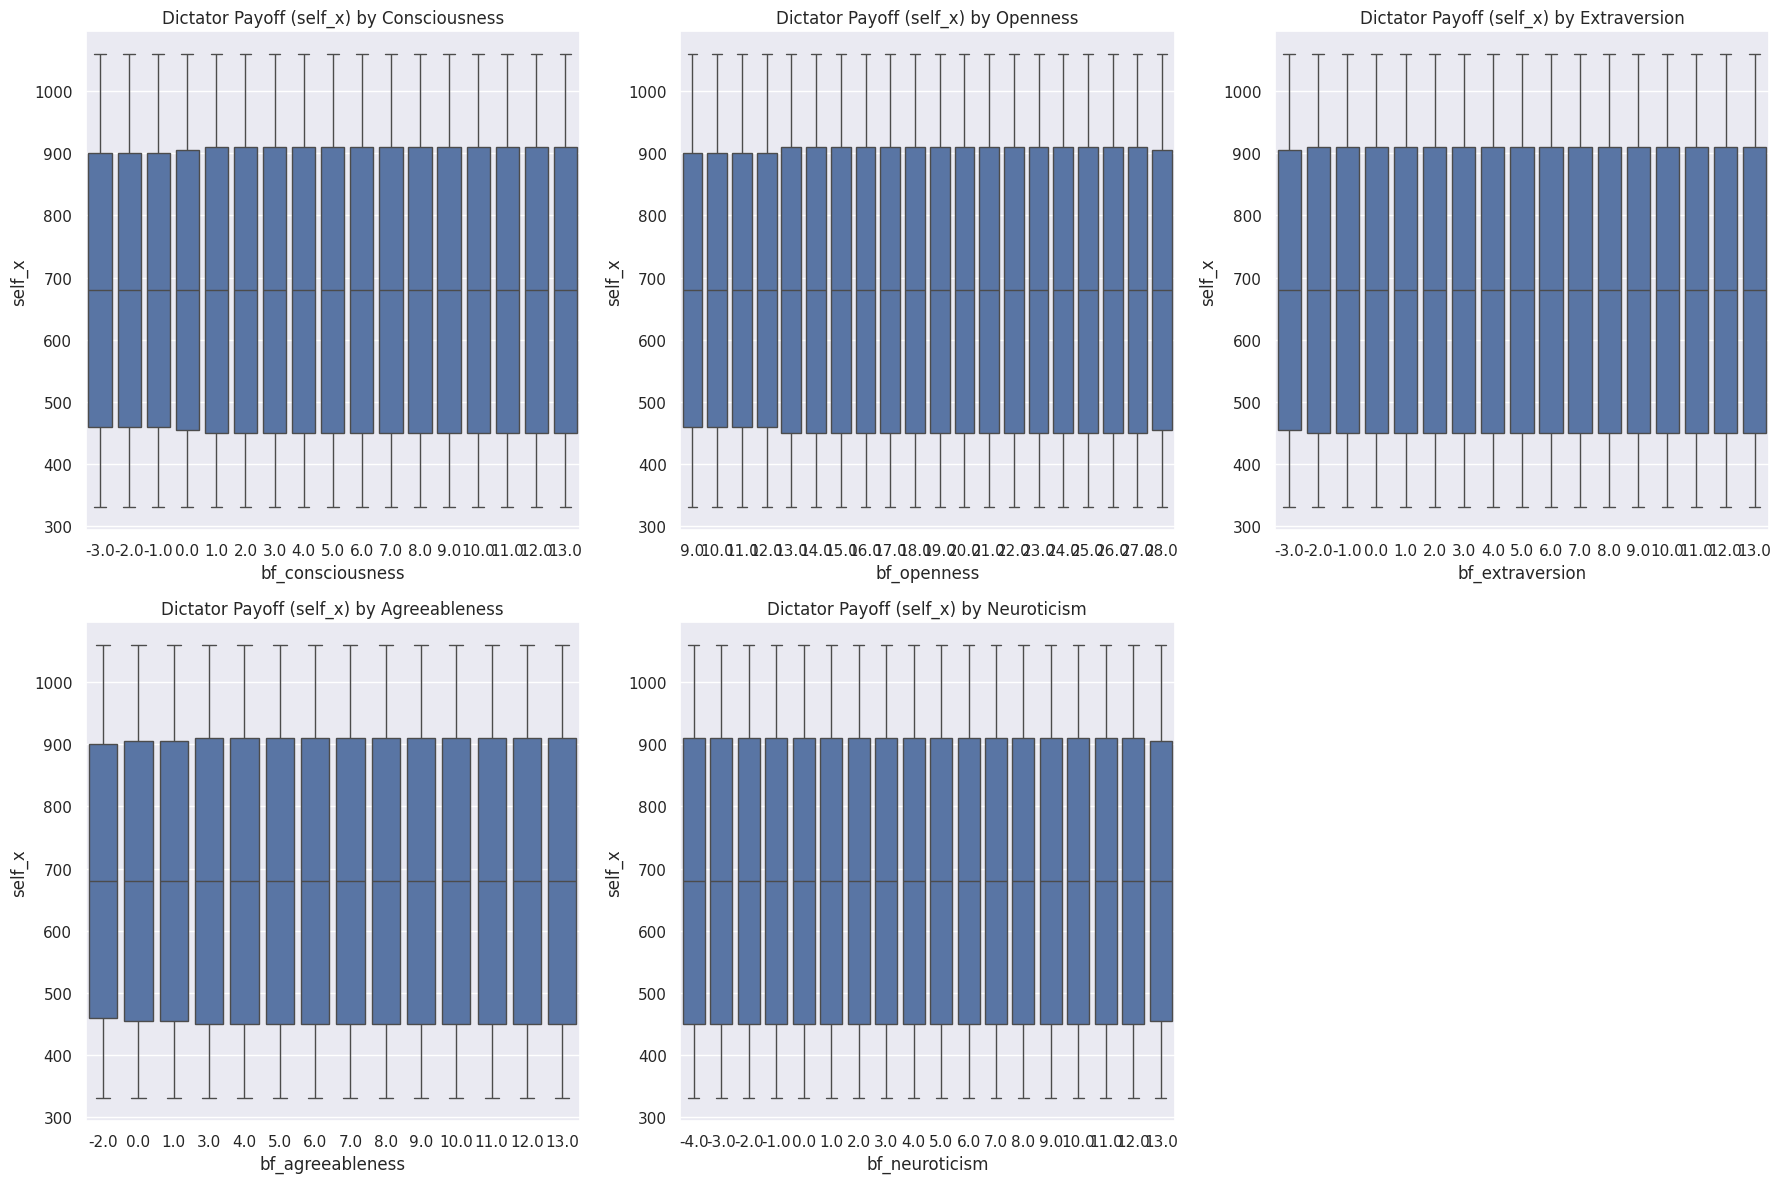

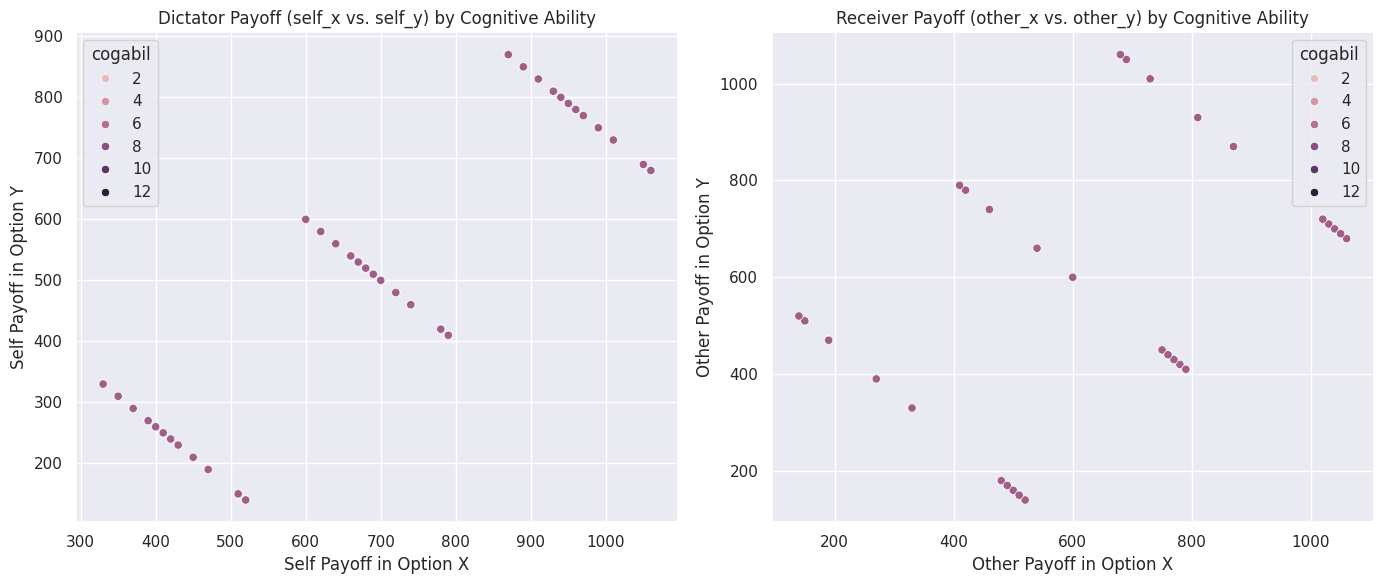

In [ ]:
#NO INDICATOR USED
plt.figure(figsize=(14, 6))

#Histogram of Payoffs for different Age Groups
merged_data['age_group'] = pd.cut(merged_data['pe_age'], bins=[18, 25, 35, 45, 55, 65, 75], labels=['18-25', '26-35', '36-45', '46-55', '56-65', '66-75'])

plt.subplot(2, 2, 1)
sns.histplot(data=merged_data, x='self_x', hue='age_group', multiple='stack', bins=10, kde=True)
plt.title('Histogram of Dictator Payoff (self_x) by Age Group')

plt.subplot(2, 2, 2)
sns.histplot(data=merged_data, x='self_y', hue='age_group', multiple='stack', bins=10, kde=True)
plt.title('Histogram of Dictator Payoff (self_y) by Age Group')

plt.subplot(2, 2, 3)
sns.histplot(data=merged_data, x='other_x', hue='age_group', multiple='stack', bins=10, kde=True)
plt.title('Histogram of Receiver Payoff (other_x) by Age Group')

plt.subplot(2, 2, 4)
sns.histplot(data=merged_data, x='other_y', hue='age_group', multiple='stack', bins=10, kde=True)
plt.title('Histogram of Receiver Payoff (other_y) by Age Group')

plt.tight_layout()
plt.show()

#Bar Plot of Choices by Gender
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='choice_x', hue='pe_female', data=merged_data)
plt.title('Choices by Gender')
plt.xlabel('Choice (1 = X, 0 = Y)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

#Box Plot of Payoffs by Big Five Personality Traits
plt.figure(figsize=(18, 12))

plt.subplot(2, 3, 1)
sns.boxplot(x='bf_consciousness', y='self_x', data=merged_data)
plt.title('Dictator Payoff (self_x) by Consciousness')

plt.subplot(2, 3, 2)
sns.boxplot(x='bf_openness', y='self_x', data=merged_data)
plt.title('Dictator Payoff (self_x) by Openness')

plt.subplot(2, 3, 3)
sns.boxplot(x='bf_extraversion', y='self_x', data=merged_data)
plt.title('Dictator Payoff (self_x) by Extraversion')

plt.subplot(2, 3, 4)
sns.boxplot(x='bf_agreeableness', y='self_x', data=merged_data)
plt.title('Dictator Payoff (self_x) by Agreeableness')

plt.subplot(2, 3, 5)
sns.boxplot(x='bf_neuroticism', y='self_x', data=merged_data)
plt.title('Dictator Payoff (self_x) by Neuroticism')

plt.tight_layout()
plt.show()

#Scatter Plot of Payoffs vs Choices with Cognitive Ability
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='self_x', y='self_y', hue='cogabil', data=merged_data)
plt.title('Dictator Payoff (self_x vs. self_y) by Cognitive Ability')
plt.xlabel('Self Payoff in Option X')
plt.ylabel('Self Payoff in Option Y')

plt.subplot(1, 2, 2)
sns.scatterplot(x='other_x', y='other_y', hue='cogabil', data=merged_data)
plt.title('Receiver Payoff (other_x vs. other_y) by Cognitive Ability')
plt.xlabel('Other Payoff in Option X')
plt.ylabel('Other Payoff in Option Y')

plt.tight_layout()
plt.show()

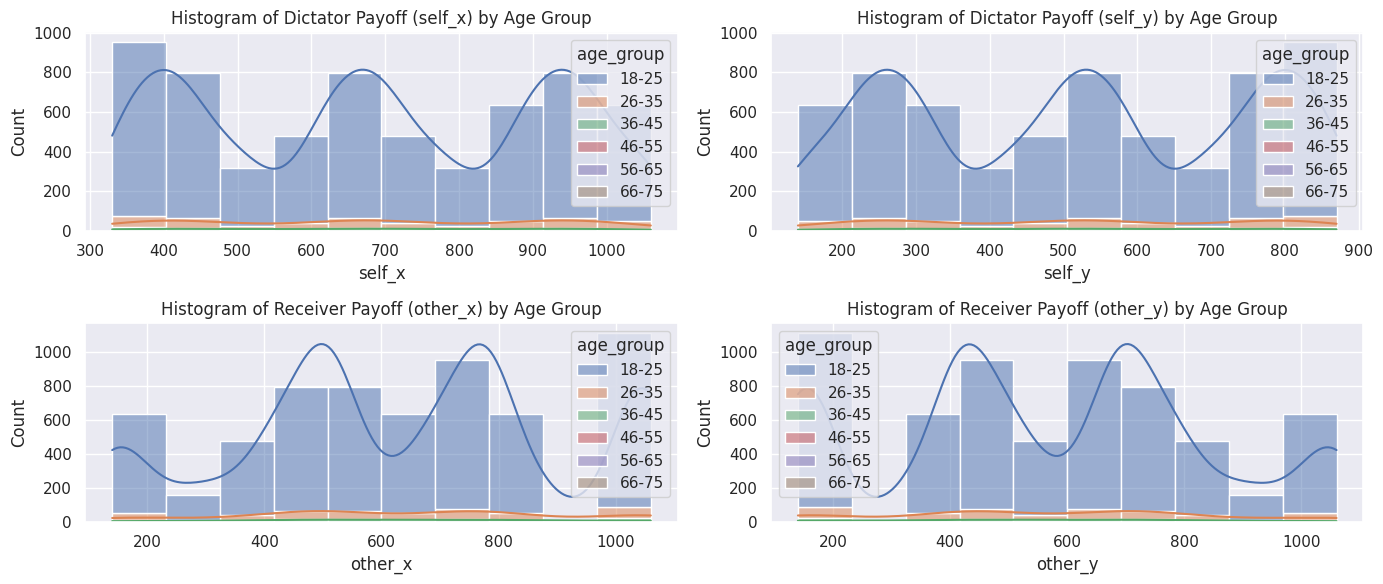

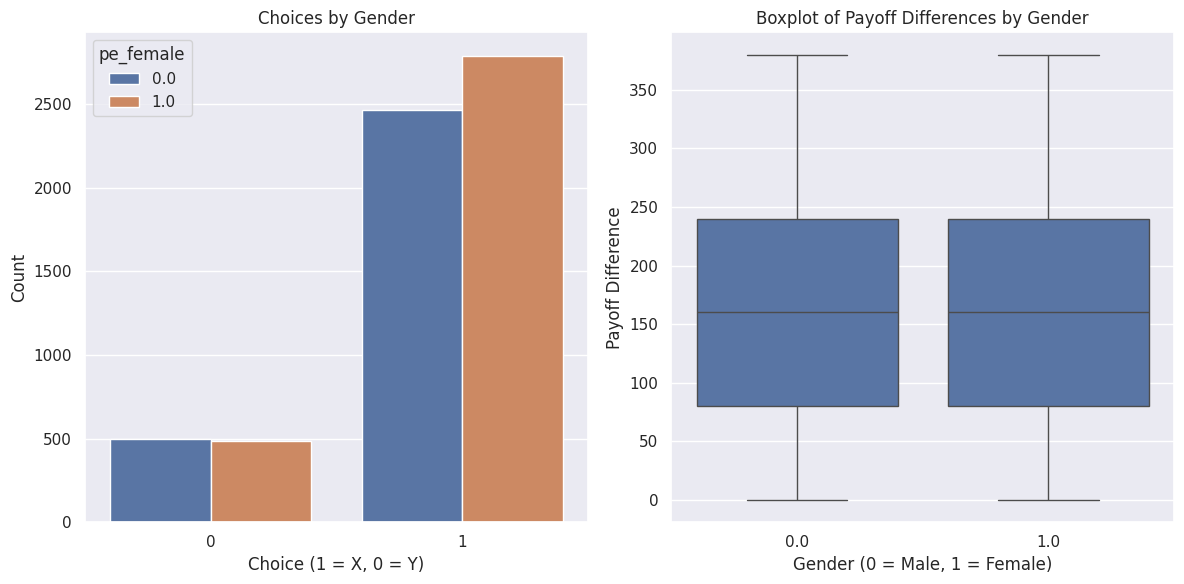

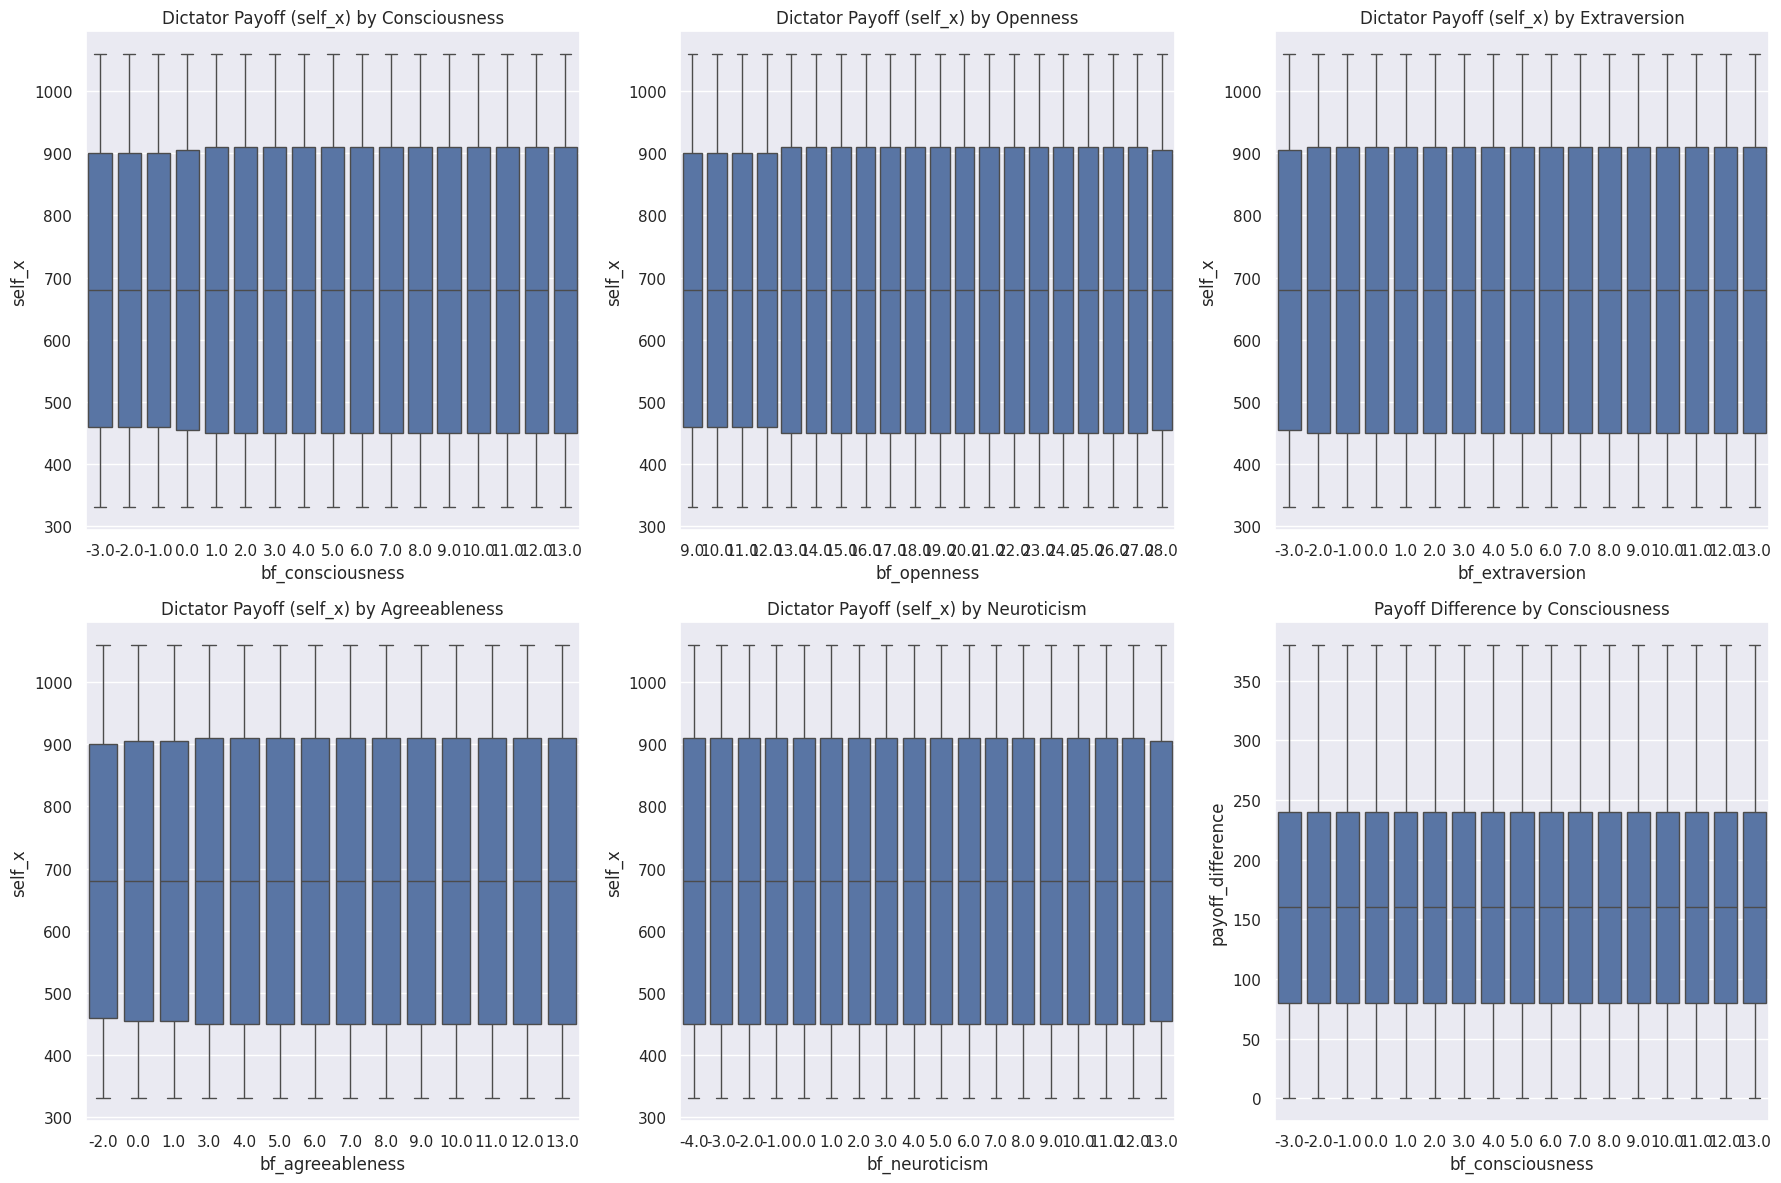

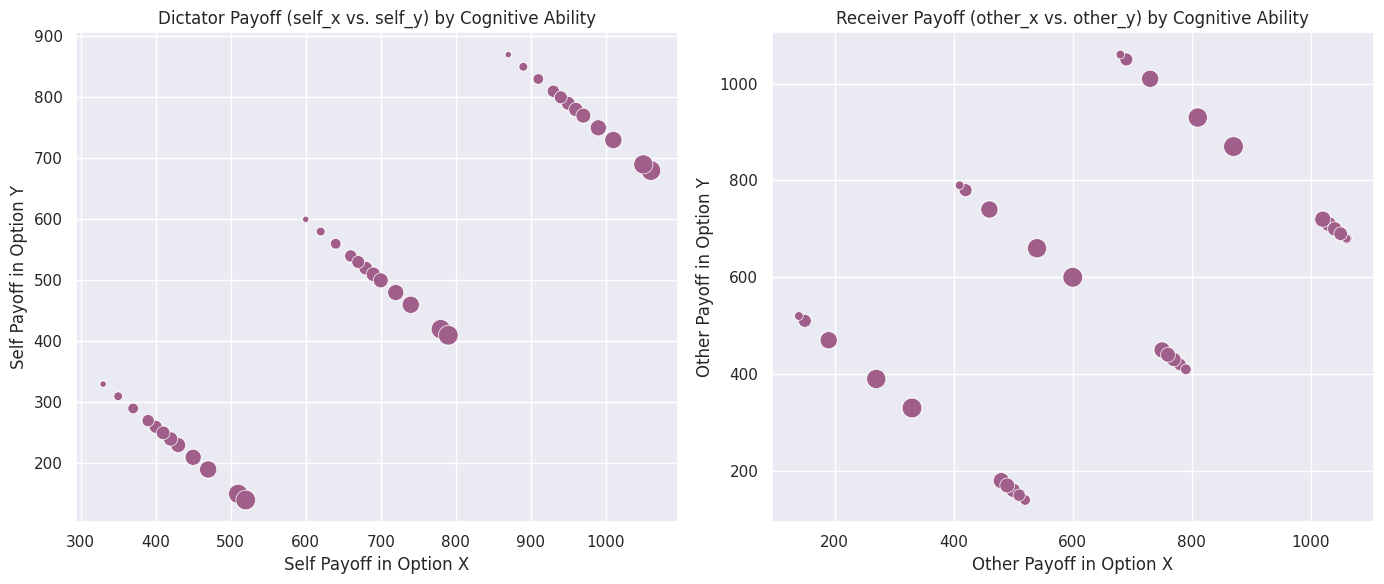

In [ ]:
#USING EVALUATION
# Histogram of Payoffs with Age Groups and Payoff Difference
plt.figure(figsize=(14, 6))
merged_data['age_group'] = pd.cut(merged_data['pe_age'], bins=[18, 25, 35, 45, 55, 65, 75], labels=['18-25', '26-35', '36-45', '46-55', '56-65', '66-75'])

plt.subplot(2, 2, 1)
sns.histplot(data=merged_data, x='self_x', hue='age_group', multiple='stack', bins=10, kde=True)
plt.title('Histogram of Dictator Payoff (self_x) by Age Group')

plt.subplot(2, 2, 2)
sns.histplot(data=merged_data, x='self_y', hue='age_group', multiple='stack', bins=10, kde=True)
plt.title('Histogram of Dictator Payoff (self_y) by Age Group')

plt.subplot(2, 2, 3)
sns.histplot(data=merged_data, x='other_x', hue='age_group', multiple='stack', bins=10, kde=True)
plt.title('Histogram of Receiver Payoff (other_x) by Age Group')

plt.subplot(2, 2, 4)
sns.histplot(data=merged_data, x='other_y', hue='age_group', multiple='stack', bins=10, kde=True)
plt.title('Histogram of Receiver Payoff (other_y) by Age Group')

plt.tight_layout()
plt.show()

# Bar Plot of Choices by Gender and Payoff Difference
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='choice_x', hue='pe_female', data=merged_data)
plt.title('Choices by Gender')
plt.xlabel('Choice (1 = X, 0 = Y)')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.boxplot(x='pe_female', y='payoff_difference', data=merged_data)
plt.title('Boxplot of Payoff Differences by Gender')
plt.xlabel('Gender (0 = Male, 1 = Female)')
plt.ylabel('Payoff Difference')

plt.tight_layout()
plt.show()

# Box Plot of Payoffs by Big Five Personality Traits and Payoff Difference
plt.figure(figsize=(18, 12))
plt.subplot(2, 3, 1)
sns.boxplot(x='bf_consciousness', y='self_x', data=merged_data)
plt.title('Dictator Payoff (self_x) by Consciousness')

plt.subplot(2, 3, 2)
sns.boxplot(x='bf_openness', y='self_x', data=merged_data)
plt.title('Dictator Payoff (self_x) by Openness')

plt.subplot(2, 3, 3)
sns.boxplot(x='bf_extraversion', y='self_x', data=merged_data)
plt.title('Dictator Payoff (self_x) by Extraversion')

plt.subplot(2, 3, 4)
sns.boxplot(x='bf_agreeableness', y='self_x', data=merged_data)
plt.title('Dictator Payoff (self_x) by Agreeableness')

plt.subplot(2, 3, 5)
sns.boxplot(x='bf_neuroticism', y='self_x', data=merged_data)
plt.title('Dictator Payoff (self_x) by Neuroticism')

plt.subplot(2, 3, 6)
sns.boxplot(x='bf_consciousness', y='payoff_difference', data=merged_data)
plt.title('Payoff Difference by Consciousness')

plt.tight_layout()
plt.show()

# Scatter Plot of Payoffs vs Choices with Cognitive Ability and Payoff Difference
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='self_x', y='self_y', hue='cogabil', size='payoff_difference', data=merged_data, sizes=(20, 200), legend=None)
plt.title('Dictator Payoff (self_x vs. self_y) by Cognitive Ability')
plt.xlabel('Self Payoff in Option X')
plt.ylabel('Self Payoff in Option Y')

plt.subplot(1, 2, 2)
sns.scatterplot(x='other_x', y='other_y', hue='cogabil', size='payoff_difference', data=merged_data, sizes=(20, 200), legend=None)
plt.title('Receiver Payoff (other_x vs. other_y) by Cognitive Ability')
plt.xlabel('Other Payoff in Option X')
plt.ylabel('Other Payoff in Option Y')

plt.tight_layout()
plt.show()

# Problem 3 - Supervised Machine Learning
#### a)
Try to predict the choices of subjects using the information provided. <br>
Report the performance measures for different predictor variables.

In [ ]:
# Insert your code here.

#### b)
Try to fill the gaps in the data using appropriate prediction models.

In [ ]:
# Insert your code here.

#### c)
The questionnaire by Bruhin et al. comprises personality traits according to the Big Five. <br>
This question asks you to impute other (economic) preferences of the study participants. <br>
Examples include:
- Social preferences (inequity aversion, reciprocity, guilt aversion...)
- Time preferences (myopia, present bias...)
- Risk preferences
- ...

Your taks is thus the following:
1. Find a dataset on individuals that contains the Big Five along with other preference measures. Think of datasets used in scientific publications.
2. Train models to predict the other preferences from the Big Five. Evaluate their performance.
3. Make an out-of sample prediction using the fitted models to impute the preference measures for the study participants of Bruhin et al.

In [ ]:
# Insert your code here.

# Problem 4 - Unsupervised Machine Learning
Use subjects' behaviors and information from the questionnaire to cluster individuals. <br>
Which is the optimal number of clusters? <br>
Can you provide an intuition for the clusters you identified? <br>
Do the clusters change when you include the imputed preferences from Problem 3c)?

In [ ]:
# Insert your code here.